In [120]:
from matplotlib.pyplot import cm
import numpy as np
import osmnx as ox
import networkx as nx
from shapely.geometry import MultiLineString

In [54]:
# Download the road network
G = ox.graph_from_place('Bremen, Germany', network_type='drive')

In [114]:
# Starting and ending point of a trip
start = [8.185539352132764,38.606855578588329]
endpoints = [[53.17993104063168,20.64882960212567],[10.17993104063168,2.62882960212567]]

In [115]:
# Retrieve nearest nodes
nodes = []
for i in endpoints:
    nodes.append(ox.nearest_nodes(G, start, i))

In [116]:
nodes[0]

[262208589, 175676192]

In [117]:
# Compute the paths of the trip
route_list = []
for i in nodes: 
    route = nx.shortest_path(G, i[0], i[1], weight='length')
    route_list.append(route)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


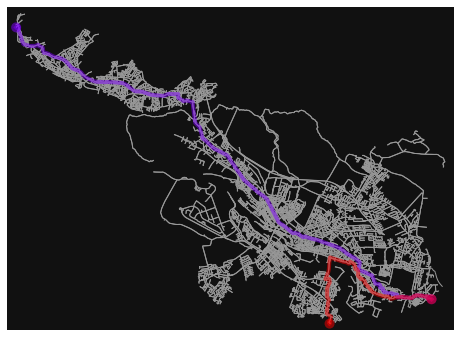

In [122]:
# Plot the trip
rc = cm.rainbow(np.linspace(0,1,len(route_list)))
fig, ax = ox.plot_graph_routes(G,
                              route_list,route_colors=rc,edge_linewidth=1,
                              node_size=0,
                              route_linewidth=6)

In [132]:
route_pairwiselist = []
edge_list = []
line_list = []

for i in route_list:
    route_pairwise = zip(i[:-1], i[1:])
    route_pairwiselist.append(route_pairwise)

for i in nodes:
    edges = ox.graph_to_gdfs(G, nodes=i)
    edge_list.append(edges)

for i in len(edge_list):
    lines = [edge_list[i].loc[uv, 'geometry'].iloc[0] for uv in route_pairwiselist[i]]
    line_list.append(lines)
    MultiLineString(line_list)

TypeError: 'int' object is not iterable

In [133]:
edges

(                     y         x            highway  street_count  ref  \
 osmid                                                                    
 125801       53.070685  8.781994  motorway_junction             3  NaN   
 125815       53.053158  8.736811                NaN             3  NaN   
 20958816     53.098445  8.871001           crossing             4  NaN   
 20958819     53.101332  8.876001                NaN             3  NaN   
 20958823     53.101627  8.880572                NaN             4  NaN   
 ...                ...       ...                ...           ...  ...   
 10002539419  53.105959  8.861638                NaN             3  NaN   
 10002559794  53.088864  8.788478                NaN             3  NaN   
 10002567116  53.094674  8.818450                NaN             3  NaN   
 10002586214  53.078080  8.754902                NaN             3  NaN   
 10017932526  53.099470  8.916626                NaN             1  NaN   
 
                       